# Access Estimate

TODO:
- Get proper NTL from website (and mosaic)
- Loop through combined.gpkg

In [2]:
%load_ext autoreload
%autoreload 2

In [23]:
from pathlib import Path

import matplotlib.pyplot as plt
import geopandas as gpd

from gridfinder._util import save_raster
from access_rates import regularise, estimate

## Setup

In [6]:
country = 'Burundi'
access = {'total': 0.08, 'urban': 0.50, 'rural': 0.02}

In [12]:
targets_in = f'targets/targets_{country}.tif'
folder = Path.home() / 'Documents/GIS'
aoi_in = folder / 'countries_rough.gpkg'
pop_in = folder / 'GHS_POP_250.tif'
urban_in = folder / 'GHS_URB_RUR.tif'
ntl_in = folder / 'VIIRS_Africa_2016.tif'

## Regularise

In [21]:
aoi_big = gpd.read_file(aoi_in)
aoi = aoi_big.loc[aoi_big["ADMIN"] == country.replace("_", " ")]

In [24]:
pop, urban, ntl, targets, affine, crs = regularise(country, aoi, pop_in, urban_in, ntl_in, targets_in)

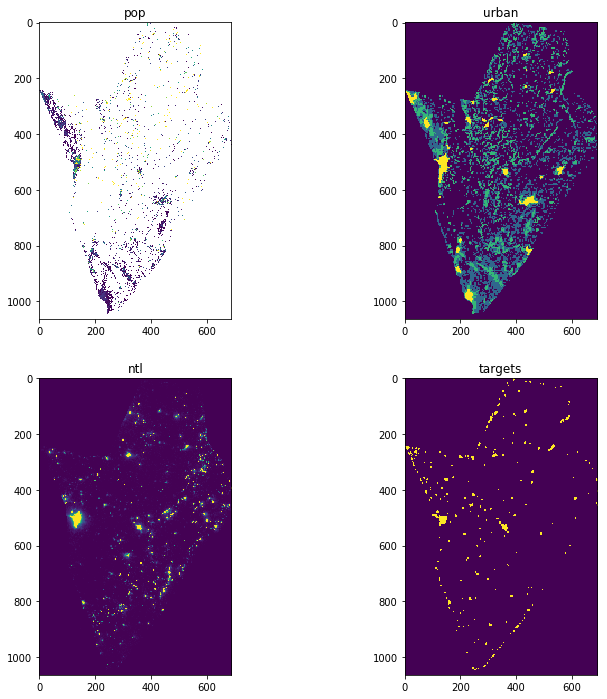

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
axes =     [ax1,   ax2,     ax3,   ax4]
rasters =  [pop,   urban,   ntl,   targets]
titles =   ['pop', 'urban', 'ntl', 'targets']
maxes =    [1000,  None,    1,     None]

for ax, raster, title, vmax in zip(axes, rasters, titles, maxes):
    ax.imshow(raster, vmax=vmax)
    ax.set_title(title)
plt.show()

## Run the algorithm

In [26]:
pop_elec = estimate(pop, urban, ntl, targets, access)

0.08 0.09919627
Reached accuracy
Access	Actual	Model
Total:	0.08	0.10
Urban:	0.50	0.28
Rural:	0.02	0.02


In [ ]:
save_raster(f'pop_elec_{country}.tif', pop_elec, affine, crs)
save_raster(f'weights_{country}.tif', weights, affine, crs)